In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def explore(file, slc, ax, x, y, col):
    d = pd.read_csv(file, skiprows=list(range(20)))
    sample_ch1 = d.iloc[slc[0]:slc[1], col[0]][166:]
    sample_ch2 = d.iloc[slc[0]:slc[1], col[1]][111:]
    sample_ch3 = d.iloc[slc[0]:slc[1], col[2]][222:]

    ax[x,y].set_ylim(0,3)
    
    ax[x,y].plot(list(range(len(sample_ch1))), sample_ch1)
    ax[x,y].plot(list(range(len(sample_ch2))), sample_ch2)
    ax[x,y].plot(list(range(len(sample_ch3))), sample_ch3)
    
    sample_ch1 = np.array(sample_ch1)
    sample_ch1 = np.reshape(sample_ch1, (-1,1))
    
    return sample_ch1


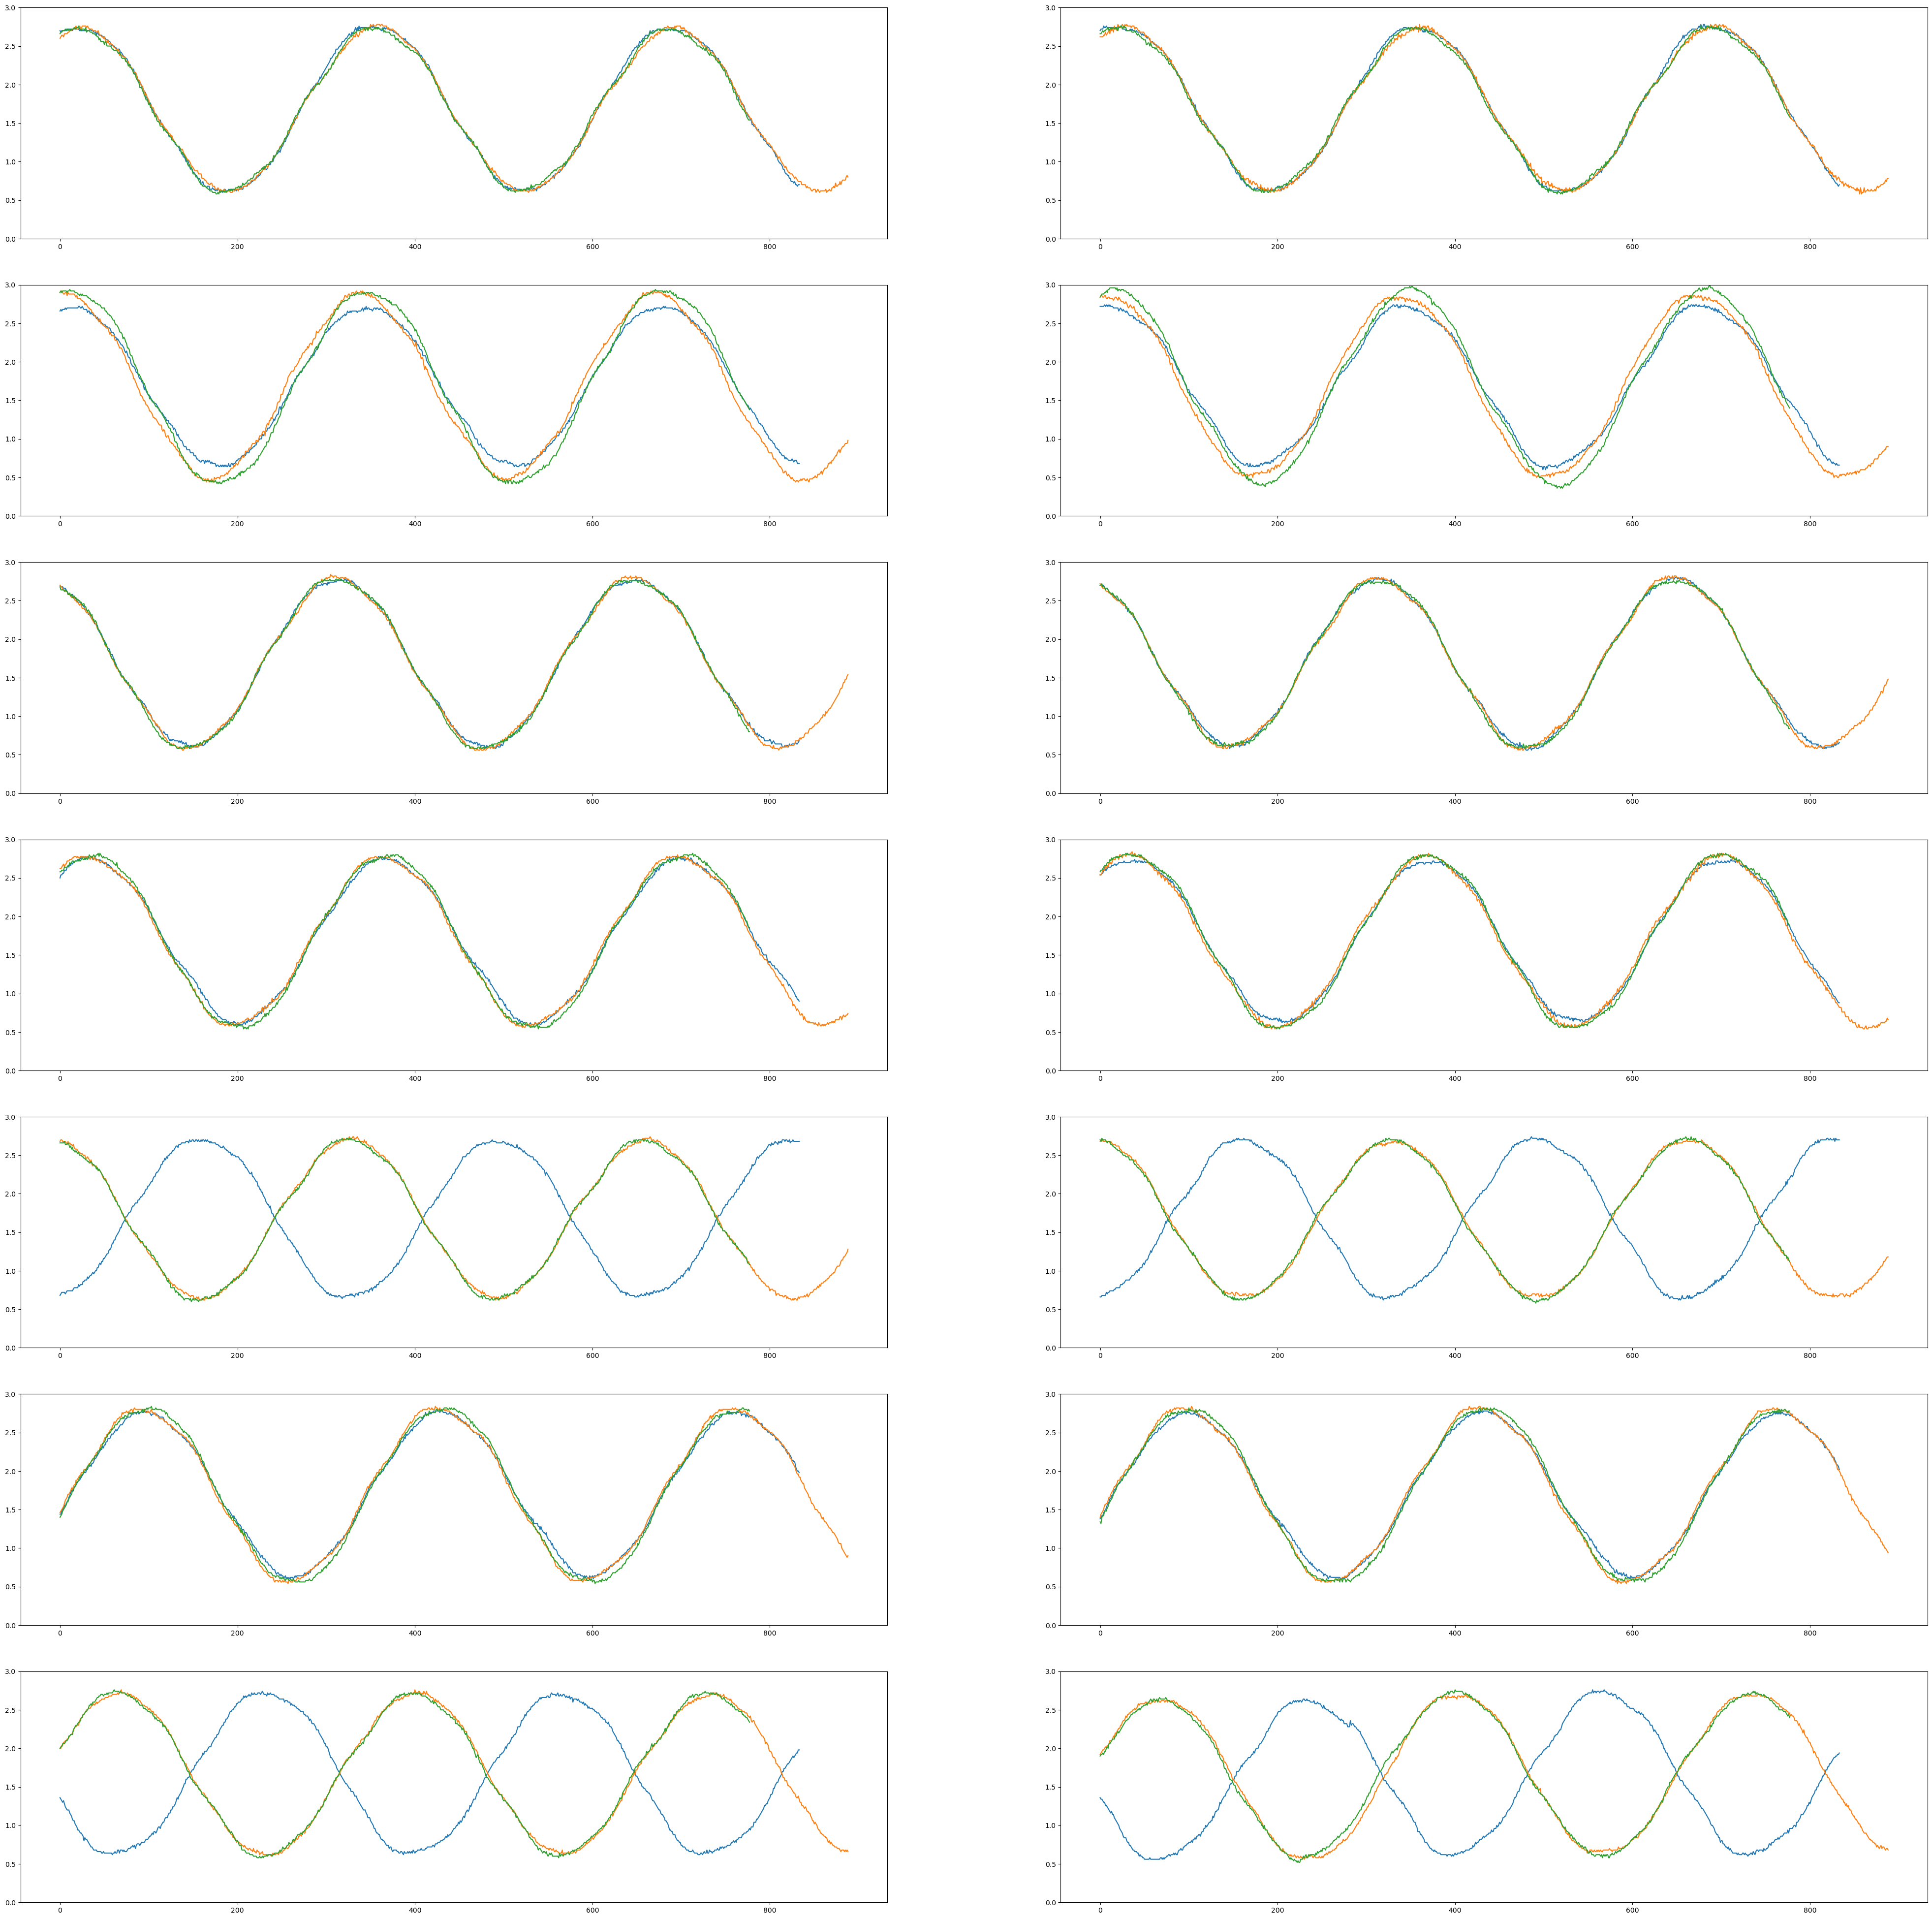

In [43]:
fig, ax = plt.subplots(7,2, figsize = (50,50))



col = [2,3,4]

sample00_ch1 = explore("RAW_DATA/0_c2264c30c100.csv",(0,1000), ax, 0,0,col)
sample01_ch1 = explore("RAW_DATA/0_c2264c30c100.csv",(50000,51000), ax, 0,1,col)

sample10_ch1 = explore("RAW_DATA/1_c0000c30c100.csv",(0,1000), ax, 6,0,col)
sample11_ch1 = explore("RAW_DATA/1_c0000c30c100.csv",(50000,51000), ax,6,1,col)

sample20_ch1 = explore("RAW_DATA/2_c0759c30c100.csv",(0,1000), ax, 2,0,col)
sample21_ch1 = explore("RAW_DATA/2_c0759c30c100.csv",(50000,51000), ax, 2,1,col)

sample30_ch1 = explore("RAW_DATA/3_c1513c30c100.csv",(0,1000), ax, 3,0,col)
sample31_ch1 = explore("RAW_DATA/3_c1513c30c100.csv",(50000,51000), ax, 3,1,col)

sample40_ch1 = explore("RAW_DATA/4_c0017c30c100.csv",(0,1000), ax, 4,0,col)
sample41_ch1 = explore("RAW_DATA/4_c0017c30c100.csv",(50000,51000), ax, 4,1,col)

sample50_ch1 = explore("RAW_DATA/5_c0776c30c100.csv",(0,1000), ax, 5,0,col)
sample51_ch1 = explore("RAW_DATA/5_c0776c30c100.csv",(50000,51000), ax, 5,1,col)

sample60_ch1 = explore("RAW_DATA/6_c1528c30c100.csv",(0,1000), ax, 1,0,col)
sample61_ch1 = explore("RAW_DATA/6_c1528c30c100.csv",(50000,51000), ax, 1,1,col)
